<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/notebooks/4_eda_pre_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

### **Conteúdo**
- **1.1.** Visão Geral
- **1.2.** Panorama Geral
- **1.3.** Análise Temporal
- **1.4.** Perfil Sociodemográfico
- **1.5.** Diagnóstico
- **1.6.** Análise Geográfica
- **1.7.** Óbito

### **Histórico de Alterações**

**Data:** 01/02/2026 | **Autor:** Larissa Tinem | Preparação dos dados, visão geral do dataset, análise temporal

**Data:** 02/02/2026 | **Autor:** Larissa Tinem | Perfil sociodemográfico

**Data:** 05/02/2026 | **Autor:** Larissa Tinem | Diagnóstico, análise geográfica, óbito


# **1. Análise Exploratória — Período Pré-Pandemia**

## **Objetivo**
Analisar o comportamento das internações por transtornos mentais
antes da pandemia, identificando padrões temporais, demográficos
e regionais.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## **1.1 Visão Geral**

In [ ]:
# Criando o dataframe
df = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pre_pandemia.parquet')

In [ ]:
# Visualizando as 5 primeiras linhas
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,NASC,IDADE,SEXO,RACA_COR,ESPEC,IDENT,MUNIC_RES,...,COBRANCA,MUNIC_MOV,CID_ASSO,CID_MORTE,COMPLEX,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,MORTE
56,353650,2014,1,1971-10-03,42,1,99,03,1,353650,...,12,353650,,,02,2013-11-02,2013-11-04,2,2,0
156,353650,2014,1,1985-11-15,28,1,99,03,1,353650,...,12,353650,,,02,2013-12-27,2013-12-29,2,2,0
233,353650,2014,1,1983-08-07,30,1,99,03,1,353650,...,12,353650,,,02,2013-12-30,2014-01-01,2,2,0
272,353650,2014,1,1941-01-24,72,1,99,03,1,353650,...,12,353650,,,02,2013-12-29,2013-12-31,2,2,0
273,353650,2014,1,1990-03-08,23,1,99,03,1,353650,...,12,353650,,,02,2013-12-22,2013-12-24,2,2,0


In [ ]:
# Quantidade de linhas e colunas
print(df.shape)

(711022, 23)


In [ ]:
# Colunas
print('COLUNAS: ', df.columns)
print('-'*80)

# Informações sobre o dataset
print('INFORMAÇÕES: ')
print(df.dtypes)

COLUNAS:  Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC', 'IDADE', 'SEXO', 'RACA_COR',
       'ESPEC', 'IDENT', 'MUNIC_RES', 'DIAG_PRINC', 'DIAG_SECUN', 'CAR_INT',
       'COBRANCA', 'MUNIC_MOV', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'DT_INTER',
       'DT_SAIDA', 'QT_DIARIAS', 'DIAS_PERM', 'MORTE'],
      dtype='object')
--------------------------------------------------------------------------------
INFORMAÇÕES: 
UF_ZI                 object
ANO_CMPT               int64
MES_CMPT               int64
NASC          datetime64[ns]
IDADE                  int64
SEXO                  object
RACA_COR              object
ESPEC                 object
IDENT                 object
MUNIC_RES             object
DIAG_PRINC            object
DIAG_SECUN            object
CAR_INT               object
COBRANCA              object
MUNIC_MOV             object
CID_ASSO              object
CID_MORTE             object
COMPLEX               object
DT_INTER      datetime64[ns]
DT_SAIDA      datetime64[ns]
QT_

In [ ]:
df.describe()

,ANO_CMPT,MES_CMPT,NASC,IDADE,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM
count,711022.000000,711022.000000,711022,711022.000000,711022,711022,711022.000000,711022.000000
mean,2016.203854,6.432912,1971-06-21 08:08:26.434962616,44.652379,2015-02-22 20:03:32.611143168,2016-09-14 06:23:41.545887488,19.501613,20.150957
min,2014.000000,1.000000,1895-04-06 00:00:00,0.000000,2007-12-28 00:00:00,2013-08-26 00:00:00,0.000000,0.000000
25%,2015.000000,3.000000,1960-05-25 00:00:00,33.000000,2014-02-14 00:00:00,2015-02-28 00:00:00,7.000000,8.000000
50%,2016.000000,6.000000,1972-04-10 00:00:00,44.000000,2015-08-21 00:00:00,2016-07-05 00:00:00,24.000000,26.000000
75%,2018.000000,9.000000,1983-08-04 00:00:00,56.000000,2017-09-15 00:00:00,2018-02-28 00:00:00,31.000000,31.000000
max,2019.000000,12.000000,2019-09-26 00:00:00,99.000000,2019-12-31 00:00:00,2019-12-31 00:00:00,262.000000,261.000000
std,1.719326,3.448085,NaN,16.185905,NaN,NaN,12.026072,11.965014


In [ ]:
# Verificando valores nulos
df.isnull().sum()

,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,0
ESPEC,0
IDENT,0
MUNIC_RES,0


In [ ]:
print('Ano mínimo: ', df['ANO_CMPT'].min())
print('Ano máximo: ', df['ANO_CMPT'].max())

Ano mínimo:  2014
Ano máximo:  2019


## **1.2. Panorama Geral**

### **1.2.1. Número total de internações**

**Análise Inicial**

- **Quantidade de linhas:** 711.022
- **Quantidade de internações:** 692.109
- **Diferença:** 18.913

A base apresentou aproximadamente 2,65% de registros duplicados, associados a reprocessamentos administrativos, os quais foram removidos para evitar superestimação do número de internações.


In [ ]:
# Identificando ~evento~ de uma internação
chave_internacao = [
    'UF_ZI',
    'ANO_CMPT',
    'MUNIC_RES',
    'DT_INTER',
    'DT_SAIDA',
    'DIAG_PRINC',
    'SEXO',
    'IDADE',
    'MORTE'
]

# Elimina duplicatas de acordo com o evento de internação
df_tratado = df.drop_duplicates(subset=chave_internacao)

# Conta o total de internações
total_internacoes = df_tratado.shape[0]
print('Número total de internações: ', total_internacoes)
print('Diferença: ', df.shape[0] - df_tratado.shape[0])


Número total de internações:  692109
Diferença:  18913


### **1.2.2. Média mensal de internações**

**Análise Inicial**

- **Média de internações por mês:** 9.612

O número médio de internações por mês no período analisado foi de
aproximadamente **9.612 internações**, calculado a partir da contagem
mensal de internações únicas.


In [ ]:
df_tratado = df_tratado.copy()

df_tratado['ano_mes'] = (
    df_tratado['ANO_CMPT'].astype(str)
    + '-'
    + df_tratado['MES_CMPT'].astype(str).str.zfill(2)
)


internacoes_mensal = df_tratado.groupby('ano_mes').size()
n_medio_mensal = internacoes_mensal.mean()
print('Média de internações por mês: ', n_medio_mensal)


Média de internações por mês:  9612.625


### **1.2.3. Quantidade de municípios residente e de internação**

**Análise Inicial**

- **Município residente:** 1038
- **Município de internação:** 315

Embora os pacientes venham de mais de mil municípios, as internações ocorrem em pouco mais de 300. Isso mostra que os hospitais estão concentrados em poucas cidades, obrigando muitos pacientes a se deslocarem para receber atendimento, evidenciando uma possível desigualdade no acesso à saúde.



In [ ]:
n_munic_res = df_tratado['MUNIC_RES'].nunique()
print('Quantidade de municípios residente: ', n_munic_res)

n_municipios_mov = df_tratado['MUNIC_MOV'].nunique()
print('Quantidade de municípios de internação: ', n_municipios_mov)

Quantidade de municípios residente:  1038
Quantidade de municípios de internação:  315


## **1.3. Análise Temporal**

### **1.3.1. Evolução Anual das Internações**

**Análise Inicial**

Observa-se aumento expressivo no número de internações até 2014, seguido de queda gradual nos anos subsequentes. Os primeiros anos da série apresentam valores reduzidos, possivelmente associados a dados incompletos.

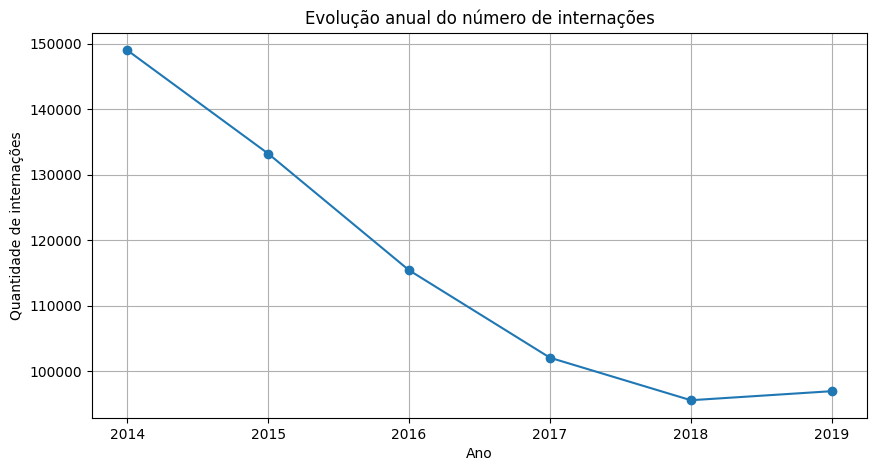

In [ ]:
internacoes_anuais = (
    df_tratado
    .groupby('ANO_CMPT')
    .size()
    .reset_index(name='qtd_internacoes')
)

plt.figure(figsize=(10,5))
plt.plot(
    internacoes_anuais['ANO_CMPT'],
    internacoes_anuais['qtd_internacoes'],
    marker='o'
)
plt.title('Evolução anual do número de internações')
plt.xlabel('Ano')
plt.ylabel('Quantidade de internações')
plt.grid(True)
plt.show()




## **1.4. Perfil Sociodemográfico**

### **1.4.1. Distribuição de idade**

- **Jovens:** 0 a 19
- **Adultos:** 20 a 59
- **Idosos:** 60 ou mais

**Análise Inicial**

O volume de internações por saúde mental é predominantemente concentrado na faixa de 20–59 anos, que supera em mais de quatro vezes o total de idosos (60+). Destaca-se a vida adulta como o período de maior vulnerabilidade ou registro de crises agudas.

In [ ]:
df_tratado = df_tratado.copy()

# Criando faixa etária
bins = [0, 19, 59, 120]
labels = ['0–19', '20–59', '60+']

df_tratado['faixa_etaria'] = pd.cut(
    df_tratado['IDADE'],
    bins=bins,
    labels=labels,
    right=True
)

# Quantidade por faixa etária
faixa_etaria_qtde = (
    df_tratado['faixa_etaria']
    .value_counts()
    .sort_index()
    .reset_index()
)

faixa_etaria_qtde.columns = ['faixa_etaria', 'quantidade']
faixa_etaria_qtde


,faixa_etaria,quantidade
0,0–19,32383
1,20–59,534205
2,60+,125468


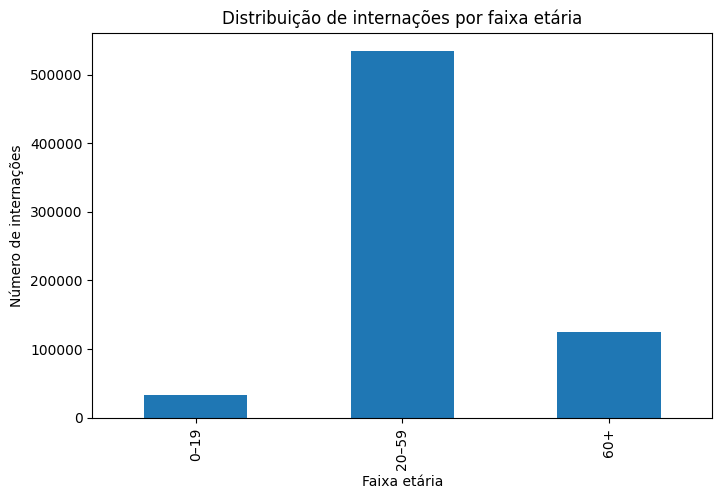

In [ ]:
plt.figure(figsize=(8,5))
faixa_etaria_qtde.set_index('faixa_etaria')['quantidade'].plot(kind='bar')
plt.title('Distribuição de internações por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Número de internações')
plt.show()


### **1.4.2. Distribuição de sexo**

**Dicionário dos dados**
- 1: Masculino
- 3: Feminino

**Análise Inicial**

O público masculino representa a maioria expressiva das internações (62%), com um volume cerca de 1,6 vez maior que o feminino. Esse dado indica uma maior prevalência de crises agudas ou menor busca por tratamento preventivo entre os homens, resultando em mais hospitalizações. Uma das hipóteses é o preconceito que homens sofrem ao falar sobre saúde mental.

In [ ]:
df_tratado['SEXO'] = df_tratado['SEXO'].replace({
    '1': 'Masculino',
    '3': 'Feminino'
})


In [ ]:
sexo_dist = (
    df_tratado['SEXO']
    .value_counts()
    .reset_index()
)

sexo_dist.columns = ['sexo', 'quantidade']
print('Distribuição Por Sexo')
print('-'*70)
print(sexo_dist)
print('-'*70)

sexo_dist['percentual'] = (
    sexo_dist['quantidade']
    / sexo_dist['quantidade'].sum()
    * 100
)
print('-'*70)
print('Percentual de Distribuição Por Sexo')
print('-'*70)
sexo_dist



Distribuição Por Sexo
----------------------------------------------------------------------
        sexo  quantidade
0  Masculino      430974
1   Feminino      261135
----------------------------------------------------------------------
----------------------------------------------------------------------
Percentual de Distribuição Por Sexo
----------------------------------------------------------------------


,sexo,quantidade,percentual
0,Masculino,430974,62.269671
1,Feminino,261135,37.730329


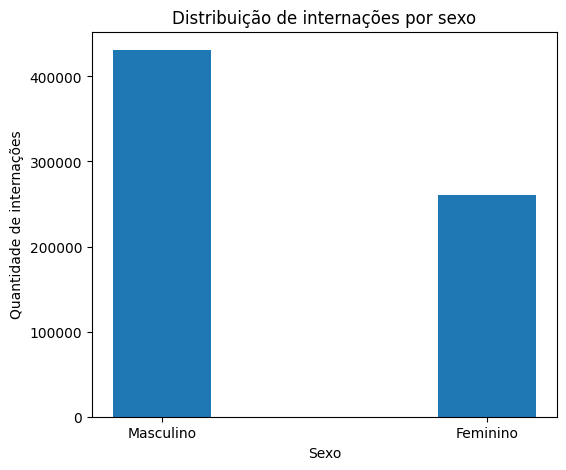

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(sexo_dist['sexo'], sexo_dist['quantidade'], width = 0.3)
plt.title('Distribuição de internações por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de internações')
plt.show()

### **1.4.3. Distribuição de Raça/Cor**

**Dicionário dos dados**
- 01: Branca
- 02: Parda
- 03: Preta
- 04: Amarela
- 05: Indigena
- 99: Ignorado

**Análise Inicial**

A predominância de pacientes brancos (55%) contrasta com a soma de pretos e pardos (30%), sugerindo disparidades no acesso ou no perfil das internações. Chama a atenção o alto volume de dados ignorados (14,4%), o que prejudica a precisão das políticas de equidade, enquanto a baixa presença de indígenas e amarelos aponta para uma possível exclusão ou subnotificação severa desses grupos no sistema.

In [ ]:
df_tratado['RACA_COR'] = df_tratado['RACA_COR'].replace({
    '01': 'Branca',
    '02': 'Parda',
    '03': 'Preta',
    '04': 'Amarela',
    '05': 'Indigena',
    '99': 'Ignorado'
})


In [ ]:
df_tratado['RACA_COR'].value_counts()


,count
RACA_COR,
Branca,381099
Preta,147714
Ignorado,99652
Parda,60331
Amarela,3298
Indigena,15


In [ ]:
raca_dist = (
    df_tratado['RACA_COR']
    .value_counts()
    .reset_index()
)

raca_dist.columns = ['raca_cor', 'quantidade']
print('Distribuição Por Raça/Cor')
print('-'*70)
print(raca_dist)
print('-'*70)

raca_dist['percentual'] = (
    raca_dist['quantidade']
    / raca_dist['quantidade'].sum()
    *100
)

print('Percentual de Distribuição Por Raça/Cor')
print('-'*70)
print(raca_dist)
print('-'*70)



Distribuição Por Raça/Cor
----------------------------------------------------------------------
   raca_cor  quantidade
0    Branca      381099
1     Preta      147714
2  Ignorado       99652
3     Parda       60331
4   Amarela        3298
5  Indigena          15
----------------------------------------------------------------------
Percentual de Distribuição Por Raça/Cor
----------------------------------------------------------------------
   raca_cor  quantidade  percentual
0    Branca      381099   55.063437
1     Preta      147714   21.342592
2  Ignorado       99652   14.398310
3     Parda       60331    8.716980
4   Amarela        3298    0.476515
5  Indigena          15    0.002167
----------------------------------------------------------------------


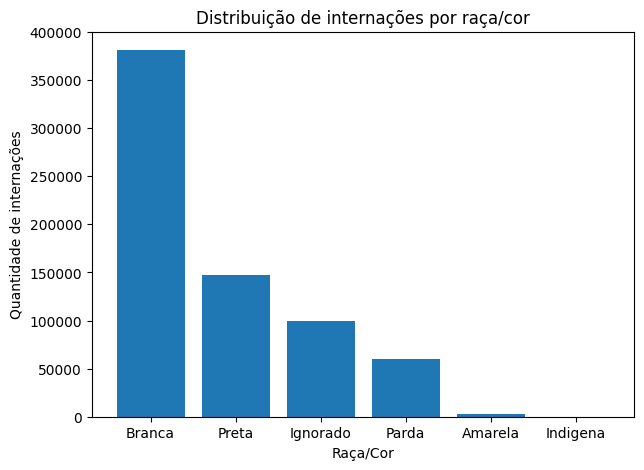

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(raca_dist['raca_cor'], raca_dist['quantidade'])
plt.title('Distribuição de internações por raça/cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Quantidade de internações')
plt.show()

## **1.5. Diagnóstico**

### **1.5.1. Top 10 Diagnóstico**

**Dicionário dos dados**

- **1º F29:** Psicoses não orgânicas não especificadas
- **2º F068:** Outros transtornos mentais especificados devidos a uma lesão e disfunção cerebral e a uma doença física
- **3º F102:** Transtornos mentais e comportamentais devidos ao uso de álcool - síndrome de dependência
- **4º F142:** Transtornos mentais e comportamentais devidos ao uso da cocaína - síndrome de dependência
- **5º F192:** Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas - síndrome de dependência
- **6º F200:** Esquizofrenia paranóide
- **7º F205:** Esquizofrenia residual
- **8º F208:** Outras esquizofrenias
- **9º F312:** Transtorno afetivo bipolar, episódio atual maníaco com sintomas psicóticos
- **10º F721:** Retardo mental grave - comprometimento significativo do comportamento, requerendo vigilância ou tratamento

**Análise Inicial**

A análise do período pré-pandemia revela que o perfil das internações em São Paulo era dominado por quadros de psicoses e esquizofrenia, além de uma forte presença de transtornos decorrentes do uso de substâncias (álcool, cocaína e múltiplas drogas).

O destaque do F29 (Psicoses não orgânicas) no topo do ranking aponta para uma alta frequência de diagnósticos genéricos ou crises agudas que exigiam hospitalização imediata. A presença significativa de dependência química (3º ao 5º lugar) reforça que, antes da COVID-19, a rede hospitalar era o principal suporte para casos graves de abuso de substâncias, enquanto o grupo das esquizofrenias (6º ao 8º lugar) evidencia o caráter crônico da demanda assistencial da época.

In [ ]:
top_10_diag_periodo = (
    df_tratado['DIAG_PRINC']
    .value_counts()
    .head(10)
)

print(top_10_diag_periodo)

DIAG_PRINC
F200    117940
F192     61826
F102     50248
F29      45462
F205     44798
F312     27724
F068     19123
F721     16549
F208     14210
F142     13448
Name: count, dtype: int64


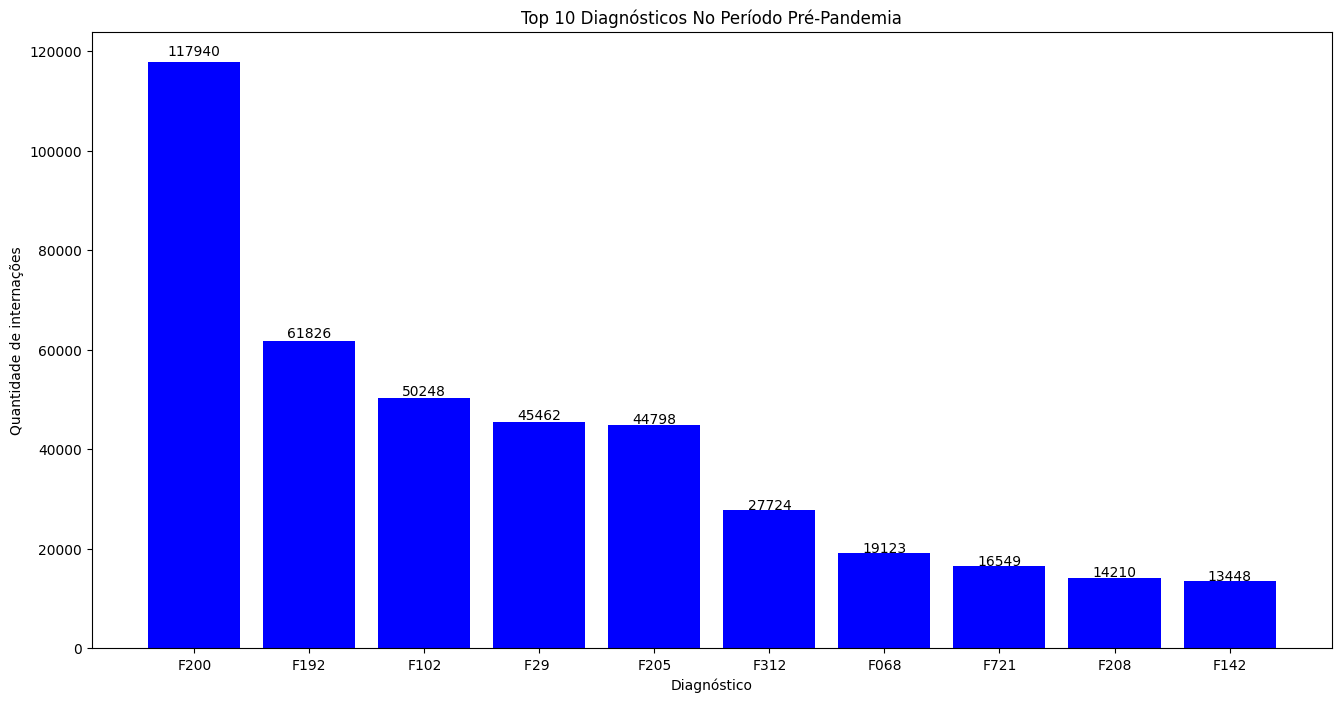

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(top_10_diag_periodo.index, top_10_diag_periodo.values, color='blue')
plt.title('Top 10 Diagnósticos No Período Pré-Pandemia')
plt.xlabel('Diagnóstico')
plt.ylabel('Quantidade de internações')
for i, v in enumerate(top_10_diag_periodo.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=10)
plt.show()

## **1.6. Análise Geográfica**

### **1.6.1. Fluxo de Origem-Destino**

**Análise Inicial**

Quase 40% dos pacientes são obrigados a viajar para se tratar, provando que a saúde mental em SP é centralizada e desigual. Isso isola o paciente da família e sobrecarrega as cidades grandes, revelando que a rede local de muitas cidades é insuficiente ou inexistente.

In [ ]:
df_tratado['evasao'] = df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']
taxa_evasao = df_tratado['evasao'].mean()*100
print(f'Taxa de evasão fora do município de residência: {taxa_evasao:.2f}')

Taxa de evasão fora do município de residência: 39.56


### **1.6.2. Município de Residência vs Internação**

**Análise Inicial**

O fluxo de internações revela uma dependência crítica de "cidades-hospital", como Itu e Jaú, que absorvem a demanda de todo o estado. O fato de a própria Capital ser a maior "exportadora" de pacientes prova que a rede local é insuficiente, forçando deslocamentos longos que isolam o paciente de sua família e evidenciam a centralização da assistência em São Paulo.

In [ ]:
# Criando a tabela de frequência de Origem -> Destino
fluxo_municipios = (
    df_tratado.groupby(['MUNIC_RES', 'MUNIC_MOV'])
    .size()
    .reset_index(name='quantidade')
    .sort_values('quantidade', ascending=False)
)

# Filtrando apenas internações que ocorreram FORA do município de residência
evasao_municipios = fluxo_municipios[fluxo_municipios['MUNIC_RES'] != fluxo_municipios['MUNIC_MOV']]

print("Top 10 Maiores Fluxos de Evasão (Cidade Origem -> Cidade Destino)")
print(evasao_municipios.head(10))

Top 10 Maiores Fluxos de Evasão (Cidade Origem -> Cidade Destino)
     MUNIC_RES MUNIC_MOV  quantidade
4170    355030    352260       10104
2776    353070    352260        5203
828     350600    352530        3995
3301    353870    354390        3307
2789    353080    352260        3219
1675    351640    354530        2693
4202    355030    355220        2124
2773    353070    351518        2008
4036    354910    351518        1996
4037    354910    352260        1801


**Análise Inicial - Cidades que mais dependem de outros municípios**

A presença de pacientes de outros estados (RO, AC, DF) com 100% de evasão destaca São Paulo como um polo de referência nacional, atraindo casos graves que não encontram suporte em suas regiões de origem.

In [ ]:
# Total de internações por cidade de residência
total_residente = df_tratado.groupby('MUNIC_RES').size()

# Total de internações feitas FORA da cidade de residência
total_fora = evasao_municipios.groupby('MUNIC_RES')['quantidade'].sum()

# Taxa de Dependência Externa (%)
taxa_dependencia = (total_fora / total_residente * 100).fillna(0).sort_values(ascending=False)

print("Cidades que mais dependem de outros municípios (Taxa de Evasão %):")
print(taxa_dependencia.head(10))

Cidades que mais dependem de outros municípios (Taxa de Evasão %):
MUNIC_RES
530180    100.0
110004    100.0
110005    100.0
110011    100.0
110012    100.0
110020    100.0
110030    100.0
110034    100.0
120001    100.0
120040    100.0
dtype: float64


/tmp/ipython-input-1596510551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


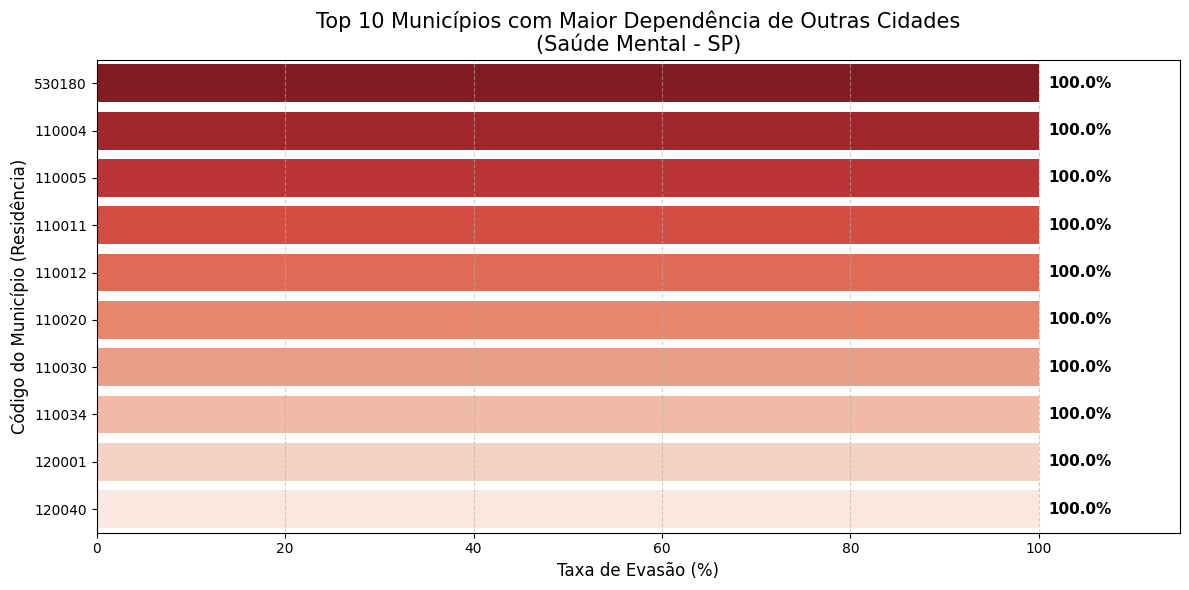

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (pegando o top 10 e transformando em DataFrame)
top_10_dep = taxa_dependencia.head(10).reset_index()
top_10_dep.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_dep,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Cores quentes para indicar alerta/dependência
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios com Maior Dependência de Outras Cidades\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Taxa de Evasão (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando os valores das porcentagens ao lado das barras
for i, v in enumerate(top_10_dep['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.xlim(0, 115) # Espaço extra para o texto não cortar
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

**Análise Inicial**

A análise das cidades como Estrela d’Oeste, Zacarias e Adolfo revela vazios assistenciais absolutos: com 100% de evasão, nenhum morador é atendido onde vive. Isso prova que, no interior de SP, a saúde mental é desigual e excludente, obrigando o paciente de cidades pequenas a se isolar da família e buscar socorro em polos distantes por falta de qualquer estrutura local.

In [ ]:
# Filtra apenas pacientes que MORAM em São Paulo (códigos começando com 35)
df_sp = df_tratado[df_tratado['MUNIC_RES'].astype(str).str.startswith('35')]

# Agora refaça o cálculo com df_sp
total_residente_sp = df_sp.groupby('MUNIC_RES').size()
total_fora_sp = evasao_municipios[evasao_municipios['MUNIC_RES'].astype(str).str.startswith('35')].groupby('MUNIC_RES')['quantidade'].sum()

taxa_dependencia_sp = (total_fora_sp / total_residente_sp * 100).fillna(0).sort_values(ascending=False)

print("Cidades de SP que mais dependem de outros municípios:")
print(taxa_dependencia_sp.head(10))

Cidades de SP que mais dependem de outros municípios:
MUNIC_RES
355730    100.0
355715    100.0
350020    100.0
355590    100.0
355570    100.0
355560    100.0
355550    100.0
355535    100.0
355530    100.0
355520    100.0
dtype: float64


/tmp/ipython-input-794898868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


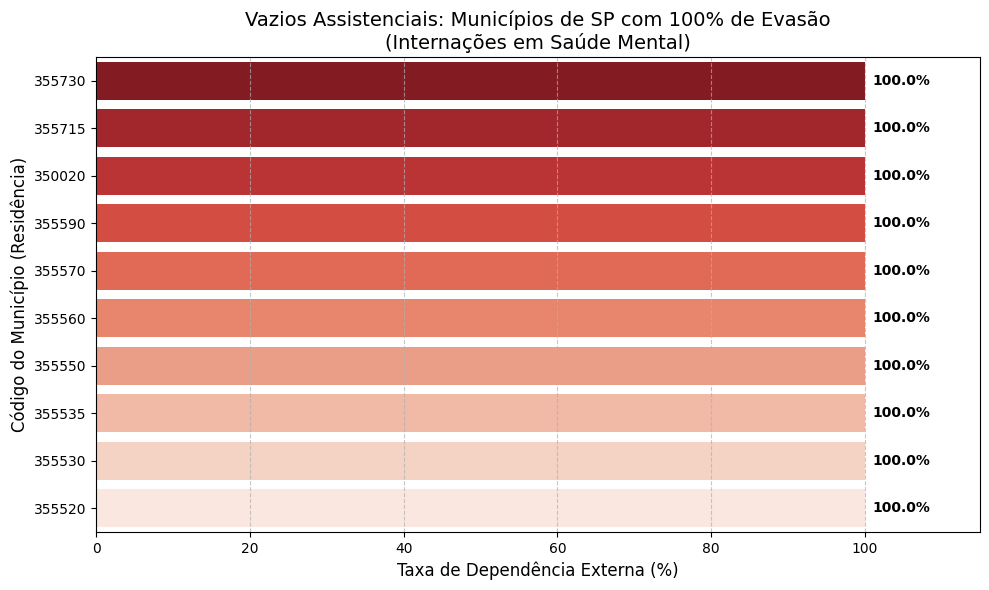

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 cidades de SP com maior evasão)
top_10_sp = taxa_dependencia_sp.head(10).reset_index()
top_10_sp.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_sp,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Vermelho para indicar alerta/falta de serviço
)

# 3. Ajustes de títulos e rótulos
plt.title('Vazios Assistenciais: Municípios de SP com 100% de Evasão\n(Internações em Saúde Mental)', fontsize=14)
plt.xlabel('Taxa de Dependência Externa (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando o rótulo de 100% ao lado de cada barra
for i, v in enumerate(top_10_sp['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.xlim(0, 115) # Ajusta o limite para o texto não sair do gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Análise Inicial**

Municípios como Itu (líder absoluto com 37 mil pacientes externos), Presidente Prudente e Sorocaba atuam como os grandes "pulmões" do sistema, absorvendo a demanda de todo o estado. Essa hiper-centralização prova que a assistência hospitalar não é regionalizada: enquanto a maioria das cidades não oferece nada, esses poucos polos carregam a sobrecarga, forçando o deslocamento em massa de pacientes e evidenciando a profunda desigualdade na distribuição de leitos.

In [ ]:
# 1. Filtra apenas casos onde o paciente saiu da sua cidade (Evasão)
df_fora = df_tratado[df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']]

# 2. Conta quem mais recebeu esses pacientes "estrangeiros"
hubs_hospitalares = (
    df_fora.groupby('MUNIC_MOV')
    .size()
    .reset_index(name='pacientes_recebidos')
    .sort_values('pacientes_recebidos', ascending=False)
)

print("Top 10 Cidades que mais recebem pacientes de outros municípios:")
print(hubs_hospitalares.head(10))

Top 10 Cidades que mais recebem pacientes de outros municípios:
    MUNIC_MOV  pacientes_recebidos
81     352260                37036
141    354140                15427
58     351518                15285
179    355220                15180
5      350190                14216
93     352530                12698
173    355030                10823
152    354530                 9691
148    354340                 9547
149    354390                 9435


/tmp/ipython-input-1950275940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


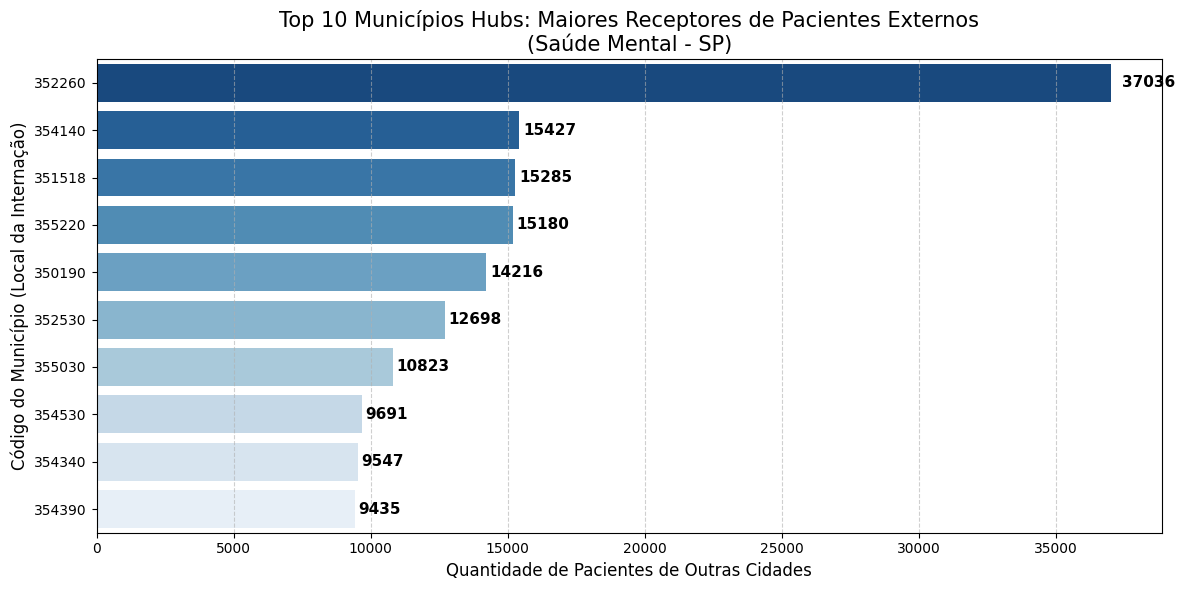

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 hubs)
top_10_hubs = hubs_hospitalares.head(10).copy()

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_hubs,
    x='pacientes_recebidos',
    y='MUNIC_MOV',
    palette='Blues_r' # Usando azul para diferenciar do gráfico de dependência (vermelho)
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios Hubs: Maiores Receptores de Pacientes Externos\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Quantidade de Pacientes de Outras Cidades', fontsize=12)
plt.ylabel('Código do Município (Local da Internação)', fontsize=12)

# Adicionando os valores exatos ao lado das barras
for i, v in enumerate(top_10_hubs['pacientes_recebidos']):
    plt.text(v + (v * 0.01), i, f'{int(v)}', va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

## **1.7. Óbito**

### **1.7.1. Taxa de Óbito Por Ano - Período Pré-Pandemia**

**Análise Inicial**

Os dados revelam que a mortalidade hospitalar em saúde mental no estado de São Paulo já apresentava uma trajetória de ascensão anos antes da crise sanitária de 2020. O pico observado em 2017 (0,33%) acende um alerta sobre a precarização do cuidado clínico dentro das unidades psiquiátricas, sugerindo que o sistema já operava sob pressão ou com falhas no suporte à saúde física dos pacientes internados.

/tmp/ipython-input-449342718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxa_obito_ano, x='Ano', y='Taxa_Obito', palette='mako')


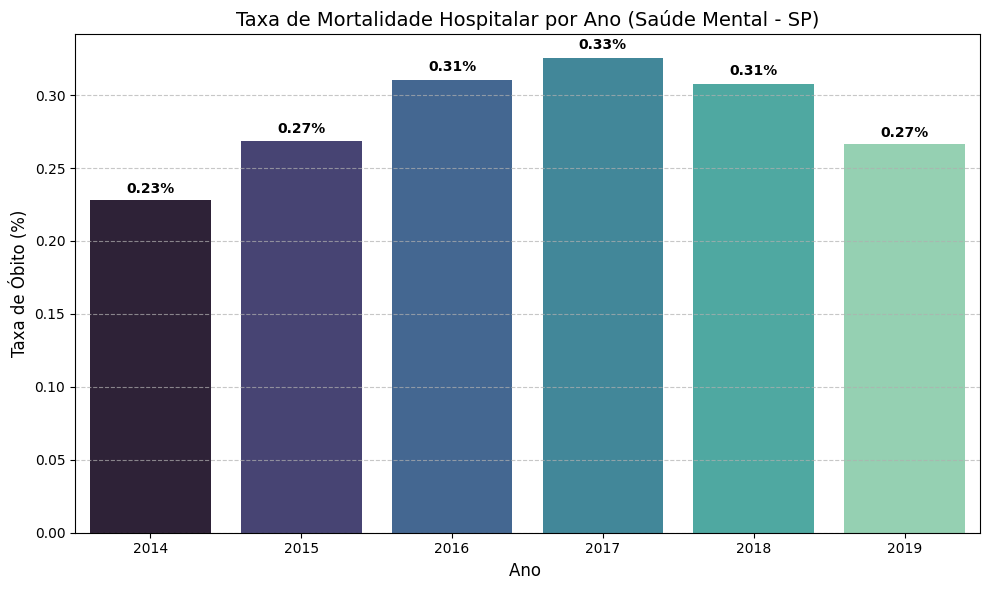

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Garante que a coluna MORTE seja numérica (0 ou 1)
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por ano
taxa_obito_ano = (df_tratado.groupby('ANO_CMPT')['MORTE'].mean() * 100).reset_index()
taxa_obito_ano.columns = ['Ano', 'Taxa_Obito']

# 3. Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=taxa_obito_ano, x='Ano', y='Taxa_Obito', palette='mako')

# Ajustes de título e eixos
plt.title('Taxa de Mortalidade Hospitalar por Ano (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Ano ', fontsize=12)

# Adicionando os valores em cima das barras para facilitar a leitura
for i, v in enumerate(taxa_obito_ano['Taxa_Obito']):
    plt.text(i, v + (v * 0.02), f'{v:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Se estiver no Jupyter/Colab use plt.show(), se quiser salvar use:
plt.savefig('taxa_obito_ano.png')
plt.show()

### **1.7.2. Óbito por Idade**

**Análise Inicial**

A análise por faixa etária revela que a mortalidade hospitalar é fortemente influenciada pela idade, com um risco mais de três vezes superior para os idosos (60+), que apresentam uma taxa de 68%. Enquanto os grupos de 0-19 anos (0,13%) e 20-59 anos (0,20%) mantêm índices mais baixos, o salto na terceira idade evidencia a vulnerabilidade clínica extrema desse público e a complexidade de tratar comorbidades físicas associadas a transtornos mentais no ambiente hospitalar.

/tmp/ipython-input-2115032494.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  morte_por_idade = df_tratado.groupby('faixa_etaria')['MORTE'].mean() * 100
/tmp/ipython-input-2115032494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=morte_por_idade.index, y=morte_por_idade.values, palette='Blues')


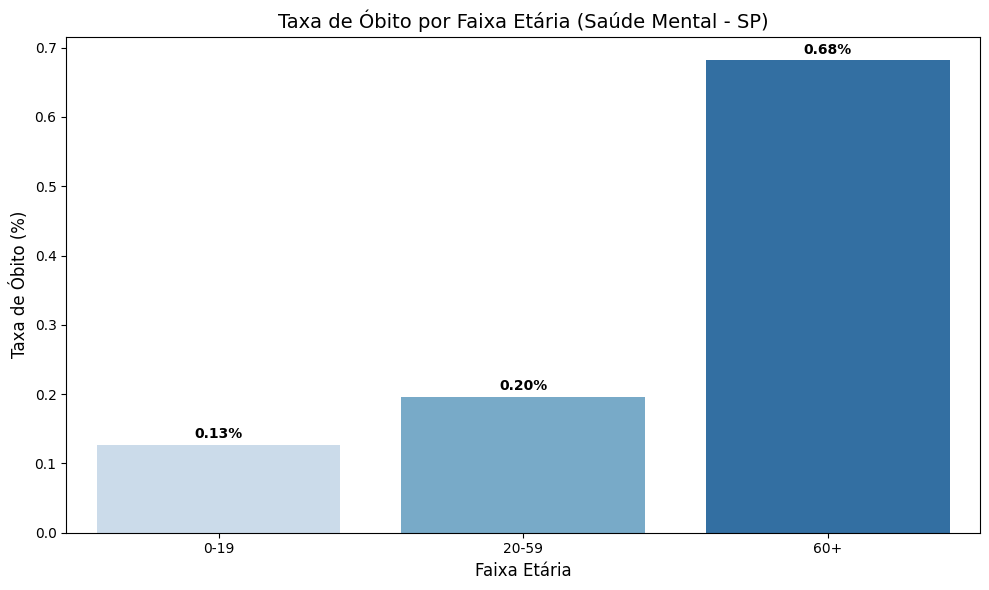

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criando as faixas etárias conforme pedido (0-19, 20-59, 60+)
# Usamos -1 para garantir que a idade 0 seja incluída
bins = [-1, 19, 59, 120]
labels = ['0-19', '20-59', '60+']
df_tratado['faixa_etaria'] = pd.cut(df_tratado['IDADE'], bins=bins, labels=labels)

# 2. Calculando a taxa de óbito por faixa
morte_por_idade = df_tratado.groupby('faixa_etaria')['MORTE'].mean() * 100

# 3. Gerando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=morte_por_idade.index, y=morte_por_idade.values, palette='Blues')

plt.title('Taxa de Óbito por Faixa Etária (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)

# Adicionando os valores nas barras
for i, v in enumerate(morte_por_idade.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.3. Óbito Por Sexo**

**Análise Inicial**

A análise do gráfico de sexo revela que a taxa de óbito hospitalar em saúde mental é ligeiramente superior entre o público masculino (0,29%) em comparação ao feminino (0,26%). Embora a diferença seja pequena, ela sugere que as internações de homens podem estar associadas a quadros clínicos de maior gravidade ou comorbidades físicas mais severas, frequentemente ligadas ao uso abusivo de substâncias.

/tmp/ipython-input-1081924192.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_obito_sexo.index, y=taxa_obito_sexo.values, palette='Blues', width=0.4)


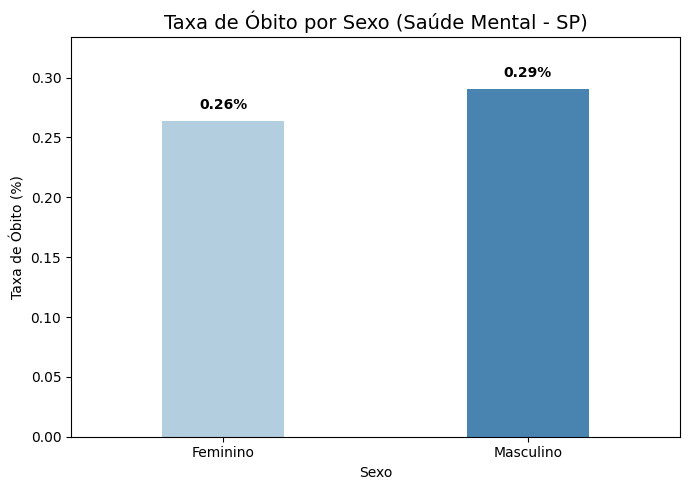

In [ ]:
# 1. Garante que a coluna MORTE é numérica
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por sexo
taxa_obito_sexo = df_tratado.groupby('SEXO')['MORTE'].mean() * 100

# 4. Gráfico
plt.figure(figsize=(7, 5))
sns.barplot(x=taxa_obito_sexo.index, y=taxa_obito_sexo.values, palette='Blues', width=0.4)

plt.title('Taxa de Óbito por Sexo (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Sexo')

plt.ylim(0, taxa_obito_sexo.values.max() * 1.15)

for i, v in enumerate(taxa_obito_sexo.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.4. Óbito por Raça/Cor**

**Análise Inicial**

A análise revela disparidades importantes, com a população Amarela (0,42%) apresentando a maior taxa. Um ponto crítico é o grupo "Ignorado" (0,38%), que possui a segunda maior letalidade; isso indica que a falha no preenchimento de dados (subnotificação) pode estar ocultando a realidade de pacientes em situações de maior vulnerabilidade social.

/tmp/ipython-input-2838572113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_obito_raca.index, y=taxa_obito_raca.values, palette='Blues', width=0.5)


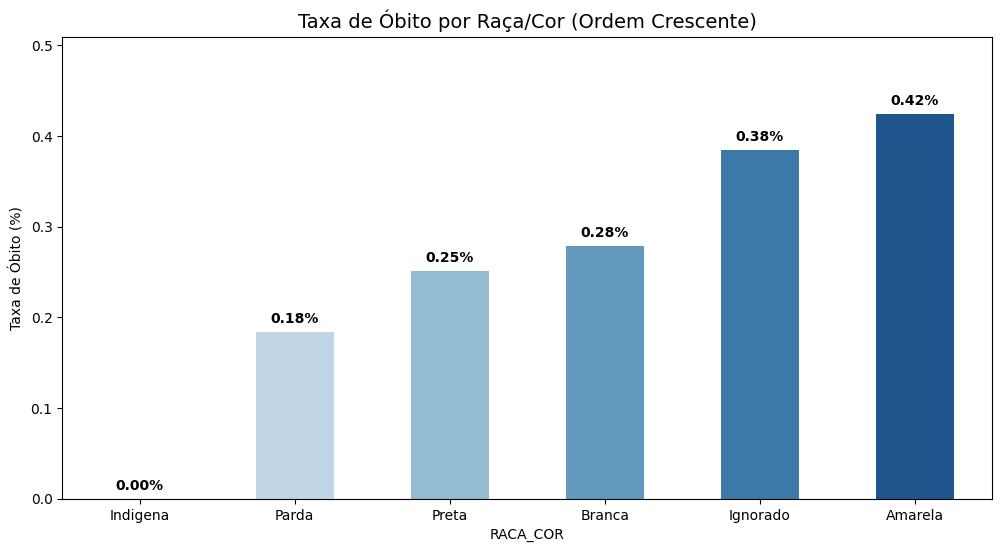

In [ ]:
# 1. Calcula a taxa e já ordena do menor para o maior
taxa_obito_raca = (df_tratado.groupby('RACA_COR')['MORTE'].mean() * 100).sort_values()

# 3. Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_obito_raca.index, y=taxa_obito_raca.values, palette='Blues', width=0.5)

plt.title('Taxa de Óbito por Raça/Cor (Ordem Crescente)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.ylim(0, taxa_obito_raca.values.max() * 1.2)

for i, v in enumerate(taxa_obito_raca.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()